# FIFA World Cup Analysis

Problem Statement:

With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung analysts who put great efforts to provide accurate data to answer every question of fans. The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football. The World Cups dataset shows all information about all the World Cups in history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups. Find key metrics and factors that influence the World Cup win. Do your own research and come up with your findings.

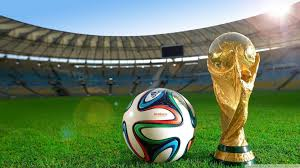

In the rich tapestry of FIFA World Cup analysis, a multidimensional approach reveals the influential factors shaping triumphs: historical performance, team composition, managerial tactics, home advantage, player fitness, and psychological resilience. These unsung analysts meticulously dissect data, offering profound insights that enrich the global football narrative, fueling the passion of fans worldwide.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data1=pd.read_csv("WorldCupMatches.csv")
data2=pd.read_csv("WorldCupPlayers.csv")
data3=pd.read_csv("WorldCups.csv")

In [3]:
data1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
data2.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
data3.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [6]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

Country Wise analysis


In [9]:
data_countries = pd.DataFrame(data3['Winner'].value_counts())
data_countries

,Winner
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2
England,1
France,1
Spain,1
Germany,1


Insights gleaned from the provided code reveal that Brazil emerges as the dominant force in World Cup history, having secured the majority of victories, thus solidifying its position as a formidable contender on the international football stage.

In [11]:
data_countries.iplot(kind='bar',y='Winner',title='Countries who have won worldcups',colors='brown')

In [12]:
data_winner=pd.DataFrame(data3['Winner'].value_counts())
data_runner_up=pd.DataFrame(data3['Runners-Up'].value_counts())
data_third=pd.DataFrame(data3['Third'].value_counts())

In [13]:
data_winner.head()

,Winner
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2


In [14]:
data_runner_up.head()

,Runners-Up
Argentina,3
Germany FR,3
Netherlands,3
Czechoslovakia,2
Hungary,2


In [15]:

data_third.head()

,Third
Germany,3
Brazil,2
Sweden,2
France,2
Poland,2


In [16]:
teams = pd.concat([data_winner, data_runner_up, data_third], axis = 1)
teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany FR,3.0,3.0,1.0
Uruguay,2.0,NaN,NaN
Argentina,2.0,3.0,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Spain,1.0,NaN,NaN
Germany,1.0,1.0,3.0
Netherlands,NaN,3.0,1.0


Null Value imputation

In [17]:
teams.fillna(0,inplace=True)

In [18]:
teams=teams.astype(int)

In [19]:
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany FR,3,3,1
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Germany,1,1,3
Netherlands,0,3,1


Insight 2 : A complete depection of number of world cups won, first runner-up, and second runner-up positions by various participating teams


In [20]:
teams.iplot(kind='bar',yTitle='Count',title='Country wise  analysis',xTitle='Country')

Number of goals per country


In [22]:
data1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Seperating data based on goals scored by teams


In [23]:
data_home=data1[['Home Team Name','Home Team Goals']].dropna()
data_away=data1[['Away Team Name','Away Team Goals']].dropna()

In [24]:
data_home.head()


,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0


In [25]:
data_away.head()


,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0


Setting up the columns in both the tables


In [26]:
data_home.columns= ['Countries','Goals']
data_away.columns= ['Countries','Goals']

In [27]:
data_country_goals = pd.concat([data_home, data_away], ignore_index=True)

In [28]:
data_country_goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


 The above table do contain all the goals both home and away but can have different values for same countries.


In [29]:
data_final_country_goal=data_country_goals.groupby('Countries').sum()


Arranging by number of goals


In [30]:
final_data=data_final_country_goal.sort_values(by='Goals',ascending=False)


In [31]:
final_data=final_data[:10]
final_data

,Goals
Countries,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0
Germany,104.0
Spain,92.0
Netherlands,91.0
Hungary,87.0


Insight 3 : Brazil scored the most number of goals thrughout the history of worldcup followed by Argentina and Germany.


In [32]:
final_data.iplot(kind='bar',yTitle='No of Goals',title='Countries with maximum number of goals',colors='red',xTitle='Country')


Comparing half time home goals scored and half time away goals scored


In [33]:

half_team_home=pd.DataFrame(data1[['Home Team Name','Half-time Home Goals']])
half_team_away=pd.DataFrame(data1[['Away Team Name','Half-time Away Goals']])




In [34]:
half_team_home = half_team_home.groupby('Home Team Name').sum()
half_team_home = half_team_home.sort_values(by='Half-time Home Goals',ascending=False)
half_team_home

,Half-time Home Goals
Home Team Name,
Brazil,66.0
Argentina,48.0
Germany FR,38.0
Italy,36.0
Hungary,33.0
...,...
Norway,0.0
Iran,0.0
New Zealand,0.0


In [35]:
half_team_away = half_team_away.groupby('Away Team Name').sum()
half_team_away = half_team_away.sort_values(by='Half-time Away Goals',ascending=False)
half_team_away

,Half-time Away Goals
Away Team Name,
Spain,20.0
Germany,18.0
Netherlands,18.0
France,17.0
Brazil,17.0
...,...
China PR,0.0
Dutch East Indies,0.0
Slovenia,0.0


Concatinating both the tables on team name


In [36]:
total = pd.concat([half_team_home, half_team_away], axis = 1)
total


,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17.0
Argentina,48.0,8.0
Germany FR,38.0,12.0
Italy,36.0,13.0
Hungary,33.0,7.0
...,...,...
Egypt,NaN,2.0
Israel,NaN,0.0
Kuwait,NaN,0.0
El Salvador,NaN,0.0


Creating total goals columns to order the table based on total number of goals scored by a team


In [37]:
total['total_goals'] = total['Half-time Home Goals'] + total['Half-time Away Goals']
total = total.sort_values(by= 'total_goals',ascending=False)
total=total[:10]
total

,Half-time Home Goals,Half-time Away Goals,total_goals
Brazil,66.0,17.0,83.0
Argentina,48.0,8.0,56.0
Germany FR,38.0,12.0,50.0
Italy,36.0,13.0,49.0
Germany,28.0,18.0,46.0
France,25.0,17.0,42.0
Hungary,33.0,7.0,40.0
Netherlands,19.0,18.0,37.0
Spain,16.0,20.0,36.0
Uruguay,27.0,6.0,33.0


 We don't require total_goals anymore, hence removing the total_goals column


In [38]:
total.pop('total_goals')
total

,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17.0
Argentina,48.0,8.0
Germany FR,38.0,12.0
Italy,36.0,13.0
Germany,28.0,18.0
France,25.0,17.0
Hungary,33.0,7.0
Netherlands,19.0,18.0
Spain,16.0,20.0
Uruguay,27.0,6.0


Insight 4 : Brazil has again scored a majority of total goals playing as home team whereas spain scored more goals playing as away country rather than home country


In [39]:
total.iplot(kind='bar',yTitle='Count',title='Country wise analysis',xTitle='Country')

Match outcomes by home and away teams

In [41]:
data1.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


We didn't considered draw matches here because in many cells we had NaN values given which corresponded to 0 values and 
could had made our pie chart biased.

In [42]:
def winner(data1):
    if data1['Home Team Goals'] > data1['Away Team Goals']:
        return 'Home team won'
    elif data1['Home Team Goals'] < data1['Away Team Goals']:
        return 'Away Team won'
    

In [43]:
data1['winner']=data1.apply(lambda x:winner(x),axis=1)

In [44]:
data1['winner'].value_counts()


Home team won    488
Away Team won    174
Name: winner, dtype: int64

In [45]:
labels=['Home team won','Away Team won']
sizes=[486,174]

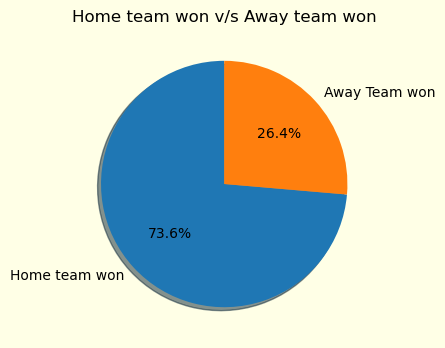

In [58]:
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0.1, 0, 0)
ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True,
      startangle = 90)
plt.title("Home team won v/s Away team won")
plt.show()

Insight 5 : 73.6 % of the matches were won by home team while 26.4 % were won by away team. 

In [48]:
data2.head()


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


Team Initials and Number Of Players Played Analysis

In [50]:
data2['Team Initials'].unique()


array(['FRA', 'MEX', 'USA', 'BEL', 'YUG', 'BRA', 'ROU', 'PER', 'ARG',
       'CHI', 'BOL', 'PAR', 'URU', 'AUT', 'HUN', 'EGY', 'SUI', 'NED',
       'SWE', 'GER', 'ESP', 'ITA', 'TCH', 'INH', 'CUB', 'NOR', 'POL',
       'ENG', 'SCO', 'FRG', 'TUR', 'KOR', 'URS', 'WAL', 'NIR', 'COL',
       'BUL', 'PRK', 'POR', 'ISR', 'MAR', 'SLV', 'GDR', 'AUS', 'ZAI',
       'HAI', 'TUN', 'IRN', 'CMR', 'NZL', 'ALG', 'HON', 'KUW', 'CAN',
       'IRQ', 'DEN', 'UAE', 'CRC', 'IRL', 'KSA', 'RUS', 'GRE', 'NGA',
       'RSA', 'JPN', 'JAM', 'CRO', 'SEN', 'SVN', 'ECU', 'CHN', 'TRI',
       'CIV', 'SCG', 'ANG', 'CZE', 'GHA', 'TOG', 'UKR', 'SRB', 'SVK',
       'BIH'], dtype=object)

In [51]:
data_nat = pd.DataFrame(data2[['Team Initials','Player Name']])
data_nat.head()



,Team Initials,Player Name
0,FRA,Alex THEPOT
1,MEX,Oscar BONFIGLIO
2,FRA,Marcel LANGILLER
3,MEX,Juan CARRENO
4,FRA,Ernest LIBERATI


In [52]:
d2 = pd.DataFrame(data_nat['Team Initials'].value_counts())
d2



,Team Initials
BRA,2403
ITA,1843
ARG,1807
ENG,1378
FRG,1364
...,...
KUW,66
CAN,66
UAE,66
CUB,45


In [53]:
d2.iplot(kind='bar',yTitle='No of players',title='Country codes vs number of players played',colors='blue',xTitle='Country code')



Insight 6 : Brazil has played the most number of players followed by Italy and Argentina

BUILDING BEE SWARM PLOT FOR NUMBER OF PLAYERS AND FINDING MINIMUM AND MAXIMUM RANGE


C:\Users\manjungy\AppData\Local\Temp\ipykernel_28700\71394551.py:4: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



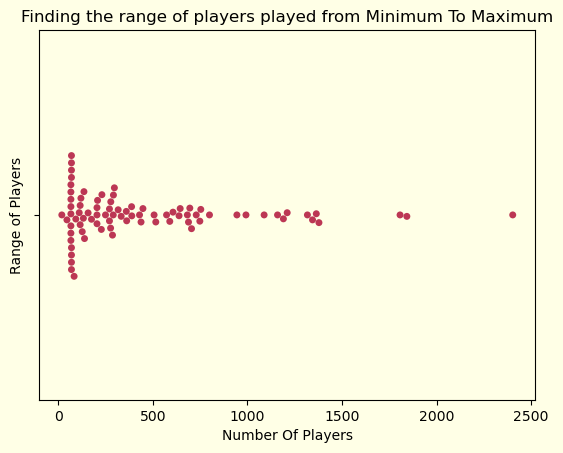

In [54]:
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"
p2 = sns.swarmplot( x = 'Team Initials', data = d2 , palette='inferno')
plt.title('Finding the range of players played from Minimum To Maximum')
plt.xlabel('Number Of Players')
plt.ylabel('Range of Players')
plt.show()

Insight 7 : Most of the teams have played between 0  and 500 players only in the complete competition, and handful of countries have played more than 1500 players in the history of competition.